### 1. Load the dataset and explore the variables.


In [10]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
#import os
#os.getcwd()
#way to check the current relative path

churn=pd.read_csv('customer_churn.csv')
churn.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [50]:
churn.Churn.value_counts(dropna=False)
#Churn is our target. 
#Churn has either Yes or No value, no nulls... yay!
#Would we call this an imbalance between Yes and Nos?   1869 out of 7043 are Yes

#Customer attrition, also known as customer churn, customer turnover, or customer defection,
#is the loss of clients or customers.

No     5174
Yes    1869
Name: Churn, dtype: int64

In [41]:
#Doing some exploratory data analysis to explore the variables

churn.describe()
churn.info()
churn.duplicated().sum()  #0 duplicate values... yay!
churn.isnull().sum() #0 null values across all columns and rows
churn['Churn'].unique()
churn['SeniorCitizen'].unique()
churn['Contract'].unique()
churn.dtypes  #float(1), integer(2), categorical(18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


In [65]:
#Categorical variables
churn['Churn'].unique() # Yes or No, categorical (Target)
churn['SeniorCitizen'].unique()  # 1 or 0 for Yes(1), Senior Citizen or No(0), not senior citizen, categorical

#Numerical variables
#churn['MonthlyCharges'].unique() #monthly charges in $$
#churn['tenure'].unique() #number of months they're a client? 
churn.dtypes
#Int64 = Senior Citizen, tenure
#MonthlyCharges = float64
#Churn = object

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2. Extract the target variable.

In [81]:
# X/y split
# X = churn.drop('Churn',axis = 1)
X = churn[['SeniorCitizen', 'MonthlyCharges', 'tenure']]
y = churn['Churn']

#do we need to drop the other categorical variables like Payment method?
#need 2 brackets because first one says you're naming a column and the second one 
#says it is a list of column names

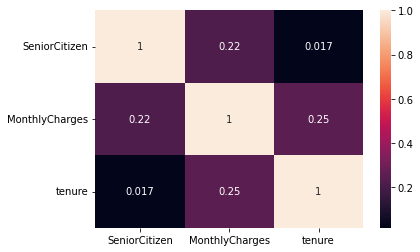

In [82]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#not seeing a strong correlation

### 3. Extract the independent variables and scale them.


In [83]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [77]:
#change the format pdtonumerical to change noninteger feature into an integer 
#all independent variables need to be treated like numericals/integers
#change MonthlyCharges from float64 to int

churn['MonthlyCharges'] = churn['MonthlyCharges'].astype(int)
churn['MonthlyCharges'].dtypes

dtype('int64')

In [84]:
#We do not need to split independent variables (MonthlyCharges, Tenure, SeniorCitizen) into 
#categorical and numerical. They're all technically numerical, even SeniorCitizen.

#We don't need to change the Target into a numerical. In general, don't mess with a Target


#we train the transformer on the train, then we immediately apply it to the X_test (this is very common)
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()


,SeniorCitizen,MonthlyCharges,tenure
0,-0.435476,-0.508622,-0.340191
1,2.296336,0.025110,0.883210
2,-0.435476,-0.808847,-1.196572
3,-0.435476,-1.476013,1.168670
4,-0.435476,0.658918,-0.829552


### 4. Build the logistic regression model.


In [4]:
# your code here

### 5. Evaluate the model.


In [5]:
# your code here

### 6. Even a simple model will give us more than 70% accuracy. Why?


In [6]:
# your code here

##### Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 


### 7. Apply imblearn.over_sampling.SMOTE to the dataset. 

In [7]:
# your code here

### 8. Build and evaluate the logistic regression model. 

In [8]:
# your code here

### 9. Is it there any improvement?

In [9]:
# your code here